In [67]:
#Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder

In [68]:
#Data: Occidental Petroleum Corporation (OXY)
data = pd.read_csv("M1_final.csv")

Data Preprocessing

In [69]:
#Check the data types
data.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

In [70]:
#Check for unique values in dew point
data['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6\xa0', '9\xa0', '5\xa0', '8\xa0',
       '10', '4\xa0', '7\xa0', '3\xa0', '2\xa0', '11', '0\xa0', '-1',
       '1\xa0', '-2', '-3'], dtype=object)

In [71]:
#Remove the "\xa0" from the data
data['Dew Point'] = data['Dew Point'].str.replace(u'\xa0', u'') 

In [72]:
#Check for unique values in dew point
data['Dew Point'].unique()

array(['34', '32', '33', '31', '30', '29', '67', '35', '36', '38', '39',
       '40', '41', '42', '28', '27', '46', '37', '44', '45', '52', '53',
       '54', '56', '57', '59', '58', '50', '43', '48', '49', '47', '21',
       '20', '22', '24', '23', '19', '18', '16', '13', '12', '14', '15',
       '17', '26', '25', '51', '55', '6', '9', '5', '8', '10', '4', '7',
       '3', '2', '11', '0', '-1', '1', '-2', '-3'], dtype=object)

In [73]:
#Convert the data type of dew point to integer
data['Dew Point'] = data['Dew Point'].astype(int)

In [74]:
#Get info on the data
#Checking for missing values
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [75]:
#View unique values in wind direction
data['Wind'].unique()

array(['W', 'WNW', 'NW', 'NNW', 'S', 'ENE', 'NE', 'NNE', 'E', 'SE',
       'CALM', 'SW', 'VAR', 'SSE', 'SSW', 'WSW', 'N', 'ESE', nan],
      dtype=object)

In [76]:
#Convert wind direction letters to numbers
data['Wind'] = data['Wind'].replace(['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW'], [0, 22.5, 45, 67.5, 90, 112.5, 135, 157.5, 180, 202.5, 225, 247.5, 270, 292.5, 315, 337.5])

#Remove rows from the dataset where wind is calm or var
data = data[data['Wind'] != 'CALM'] #Not able to assign a direction to these values
data = data[data['Wind'] != 'VAR']

#Removes null values from wind
data = data[data['Wind'].notna()]

In [77]:
#View unique values in wind direction
data['Wind'].unique()

array([270, 292.5, 315, 337.5, 180, 67.5, 45, 22.5, 90, 135, 225, 157.5,
       202.5, 247.5, 0, 112.5], dtype=object)

In [78]:
#Convert wind direction to float
data['Wind'] = data['Wind'].astype(float)

In [79]:
#View unique values in condition
data['Condition'].unique()

array(['Fair / Windy', 'Fair', 'Light Rain / Windy', 'Partly Cloudy',
       'Mostly Cloudy', 'Cloudy', 'Light Rain', 'Mostly Cloudy / Windy',
       'Partly Cloudy / Windy', 'Light Snow / Windy', 'Cloudy / Windy',
       'Light Drizzle', 'Rain', 'Heavy Rain', 'Fog', 'Wintry Mix',
       'Light Freezing Rain', 'Light Snow', 'Wintry Mix / Windy',
       'Fog / Windy', 'Light Drizzle / Windy', 'Rain / Windy',
       'Drizzle and Fog', 'Snow', 'Heavy Rain / Windy'], dtype=object)

In [80]:
#Use LabelEncoder to convert condition to numbers
le = LabelEncoder()
data['Condition'] = le.fit_transform(data['Condition'])

In [81]:
#View unique values in condition
data['Condition'].unique()

array([ 4,  3, 13, 18, 16,  0, 12, 17, 19, 15,  1,  9, 20,  7,  5, 23, 11,
       14, 24,  6, 10, 21,  2, 22,  8])

In [82]:
#Remove the all the columns in the data set with data type object
data = data.select_dtypes(exclude=['object'])

<AxesSubplot: >

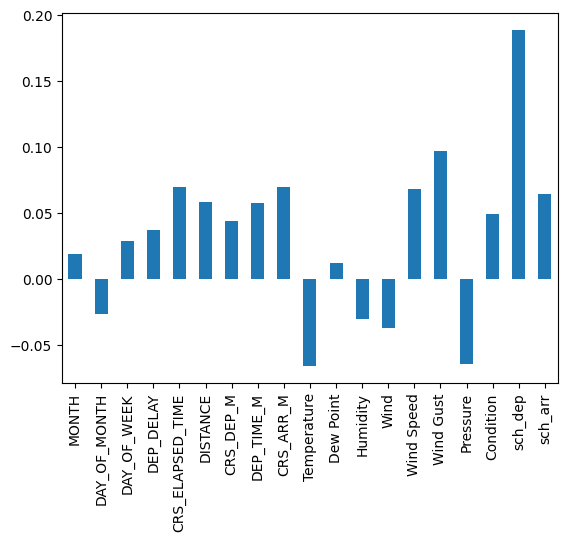

In [83]:
#Graph correlation of varaibles with the TAXI_OUT as bar chart, excluding the TAXI_OUT variable
data.corr()['TAXI_OUT'].drop('TAXI_OUT').plot(kind='bar')

In [84]:
#Specifying data for model
X = data.drop('TAXI_OUT', axis=1)
y = data['TAXI_OUT']

In [85]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # 80% training and 20% test

In [86]:
#Scaling the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train) #Fitting the scaler to the training data
X_test = sc.transform(X_test) #Transforming the test data

In [87]:
#Perform Linear Regression
rg = LinearRegression()
rg.fit(X_train, y_train)

#Make predictions
pred = rg.predict(X_test)

#Actual value vs predicted value
act_pred = pd.DataFrame({"Actual value": y_test, "Predicted Value": pred})
act_pred

,Actual value,Predicted Value
22299,19,19.290710
6336,20,22.376759
2685,21,19.182666
14036,25,20.234490
5736,17,22.155942
...,...,...
12821,26,22.990252
27538,18,20.128547
8987,22,21.673962
221,26,20.705963


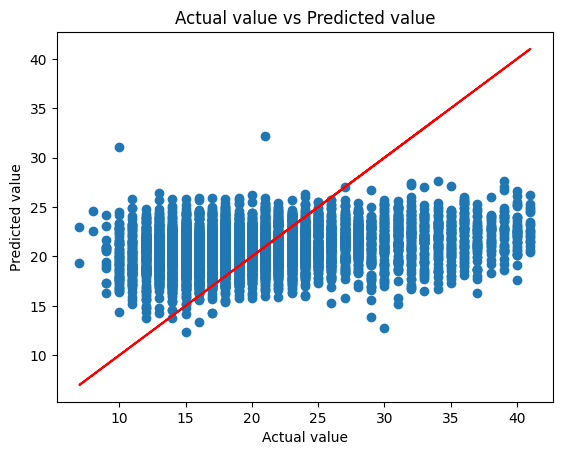

In [88]:
#Plot actual value vs predicted value
plt.scatter(y_test, pred)

#Plot the line y=x
plt.plot(y_test, y_test, color='red')

#Labels
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual value vs Predicted value")
plt.show()

In [89]:
#Measuring accuracy of the model
#Mean squared error
print("Root mean squared error =", np.sqrt(round(sm.mean_squared_error(y_test, pred), 5)))

Root mean squared error = 6.594620534951196


In [90]:
#Perform ridge regression
ridgeReg = Ridge(alpha=0.05, normalize=True) #Setting the regularization parameter
ridgeReg.fit(X_train, y_train)
pred = ridgeReg.predict(X_test)

#Mean squared error
print("Root mean squared error =", np.sqrt(round(sm.mean_squared_error(y_test, pred), 5)))

Root mean squared error = 6.60479447068567


c:\Users\JFFar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [91]:
#Perform lasso regression
lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg.fit(X_train, y_train)
pred = lassoReg.predict(X_test)

#Mean squared error
print("Root mean squared error =", np.sqrt(round(sm.mean_squared_error(y_test, pred), 5)))

Root mean squared error = 6.875006909087437


c:\Users\JFFar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [92]:
#Perform random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

#Mean squared error
print("Root mean squared error =", np.sqrt(round(sm.mean_squared_error(y_test, pred), 5)))

Root mean squared error = 5.80890867547425


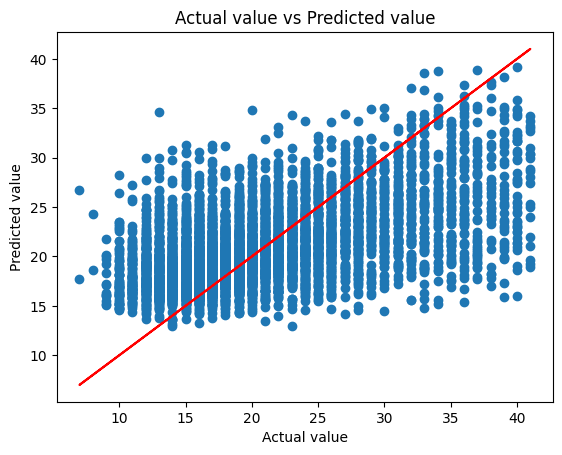

In [93]:
#Plot actual value vs predicted value
plt.scatter(y_test, pred)

#Plot the line y=x
plt.plot(y_test, y_test, color='red')

#Labels
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Actual value vs Predicted value")
plt.show()